In [ ]:
!pip install lightkurve

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 90.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 33.8 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=d48e234ee7d230d2cf052b3957622ab2f5fed3e7245f3d5c61e53602db8120d5
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=memoization-0.4.0-py3

In [ ]:
import pandas as pd
import matplotlib
import numpy as np
from astropy.timeseries import LombScargle
from sklearn.linear_model import LinearRegression
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

<ipython-input-25-95acac5fed5e>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
data5 = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/abs_b.xlsx')
abs_b = pd.DataFrame(data5)
hjd_b, mag_abs_b = abs_b['HJD_b'], abs_b['mag_b']
data6 = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/abs_v.xlsx')
abs_v = pd.DataFrame(data6)
hjd_v, mag_abs_v = abs_v['HJD_v'], abs_v['mag_v']
data7 = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/abs_r.xlsx')
abs_r = pd.DataFrame(data7)
hjd_r, mag_abs_r = abs_r['HJD_r'], abs_r['mag_r']
data_2 = pd.read_excel('/content/drive/MyDrive/photometry SX Phe/stromgen.xlsx')
stank = pd.DataFrame(data_2)
hjd_t, mag_v = stank['HJD'], stank['V mag']

In [ ]:
data1 = pd.read_excel('/content/drive/MyDrive/Tugas Akhir Sulthan/phot v.xlsx')
flux_v = pd.DataFrame(data1)
flux_v

,J.D.-2400000,JD_UTC,HJD_UTC,BJD_TDB,AIRMASS,CCD-TEMP,EXPTIME,FWHM_Mean,rel_flux_T1,rel_flux_C2,...,Y(FITS)_C3,Source-Sky_C3,Source_Error_C3,Source_SNR_C3,Peak_C3,Mean_C3,Sky/Pixel_C3,FWHM_C3,Width_C3,Variance_C3
0,60025.235868,2.460025e+06,2.460025e+06,2.460025e+06,1.229888,-4.95,30,3.856719,0.501451,0.712408,...,1619.746305,326593.459042,942.112076,346.660941,20503,1883.520426,159.547826,3.804979,5.053281,1.128953e+07
1,60025.237850,2.460025e+06,2.460025e+06,2.460025e+06,1.219145,-4.95,30,3.748450,0.497948,0.726463,...,1619.518670,327915.498943,934.716472,350.818145,21043,1975.036760,161.190945,3.716731,5.006107,1.220277e+07
2,60025.241469,2.460025e+06,2.460025e+06,2.460025e+06,1.200743,-4.95,30,3.984301,0.495822,0.717869,...,1618.327085,359285.608888,972.096947,369.598536,22481,2112.543659,159.784114,3.914753,5.140031,1.331502e+07
3,60025.243443,2.460025e+06,2.460025e+06,2.460025e+06,1.190977,-4.95,30,3.611176,0.496852,0.724845,...,1619.622838,313625.161020,917.777927,341.722275,21999,1943.922281,161.997845,3.498403,4.875553,1.231088e+07
4,60025.245418,2.460025e+06,2.460025e+06,2.460025e+06,1.181699,-4.95,30,3.614416,0.495027,0.717801,...,1619.598199,327700.868656,934.775018,350.566567,21776,1987.559222,162.521385,3.564605,5.044104,1.151919e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,60046.408054,2.460046e+06,2.460046e+06,2.460046e+06,1.469786,-4.95,25,5.431548,0.702970,0.733906,...,794.073584,685693.632307,1366.850723,501.659487,18611,1818.576945,139.028292,5.606440,7.615618,9.210686e+06
349,60046.409669,2.460046e+06,2.460046e+06,2.460046e+06,1.485991,-4.95,25,5.591731,0.694625,0.722481,...,793.444863,682536.109753,1380.981079,494.240015,18596,1709.757294,137.477907,5.509409,7.633027,8.505010e+06
350,60046.411292,2.460046e+06,2.460046e+06,2.460046e+06,1.502661,-4.95,25,6.333817,0.679611,0.738018,...,795.374027,669426.006467,1421.878731,470.803868,13495,1412.734334,143.580831,6.329625,8.440090,5.003499e+06
351,60046.412909,2.460046e+06,2.460046e+06,2.460046e+06,1.520108,-4.95,25,7.019413,0.664330,0.723674,...,794.358023,681123.548924,1431.383348,475.849848,12117,1412.464784,145.693305,6.880575,8.601615,4.697680e+06


In [ ]:
t_hjd = flux_v['HJD_UTC']
rel_flux = flux_v['rel_flux_T1']
rel_flux_err = flux_v['rel_flux_err_T1']

In [ ]:
import lightkurve as lk
lc = lk.LightCurve(time=t_hjd, flux=rel_flux, flux_err=rel_flux_err)
lc

time,flux,flux_err
,,
Time,float64,float64
2460025.23999028,0.501450595,0.001946752
2460025.241971799,0.497947956,0.001912578
2460025.245591596,0.49582237,0.001814493
2460025.247565302,0.496852009,0.001954339
2460025.249540571,0.495026917,0.001909598
2460025.251513732,0.512152054,0.002146327
2460025.253479926,0.514748007,0.0019982
2460025.255446826,0.534407148,0.002518596


<Axes: xlabel='Time [JD]', ylabel='Flux'>

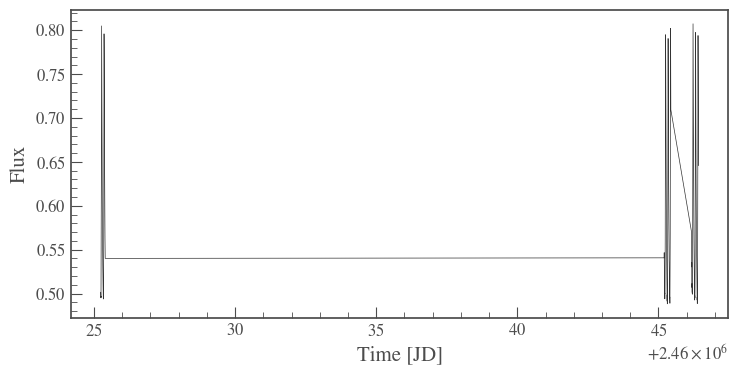

In [ ]:
lc.plot()

/usr/local/lib/python3.10/dist-packages/lightkurve/periodogram.py:932: LightkurveWarning: Building a Lomb Scargle Periodogram using the `slow` method. `nterms` has been set to >1, however this is not supported under the `fast` method. To run with higher nterms, set `ls_method` to either 'fastchi2', or 'chi2'. Please refer to the `astropy.timeseries.periodogram.LombScargle` documentation.
  warnings.warn(


<Quantity 0.08802887 d>

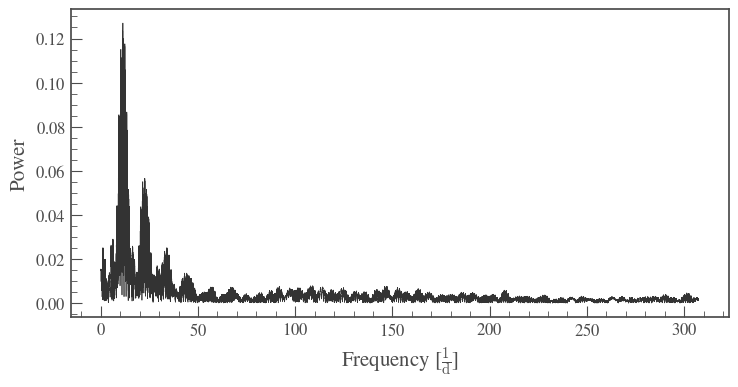

In [ ]:
pg = lc.to_periodogram(nterms=3)
pg.plot();
period = pg.period_at_max_power
period

<Axes: xlabel='Phase [JD]', ylabel='Flux'>

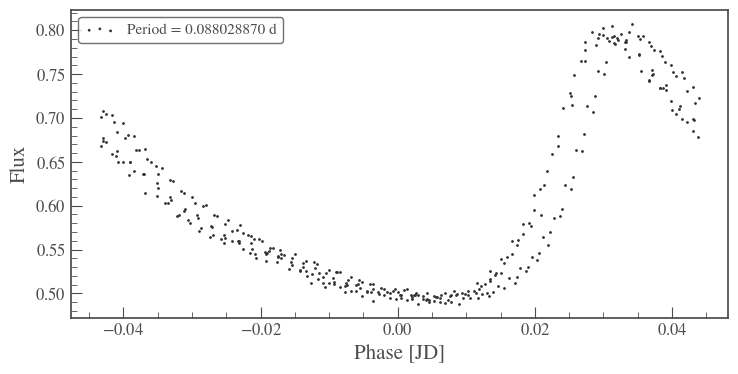

In [ ]:
lc.fold(period).scatter(label=f'Period = {period.value:.9f} d')
#matplotlib.pyplot.savefig('test.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [ ]:
period = pg.period_at_max_power
period

<Quantity 0.00695791 1 / uHz>

<Axes: xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Power [$\\mathrm{\\frac{ppt^{2}}{\\mu Hz}}$]'>

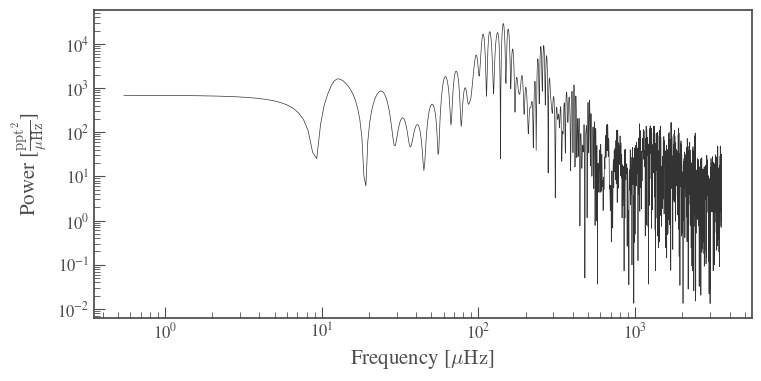

In [ ]:
pg.plot(scale='log')

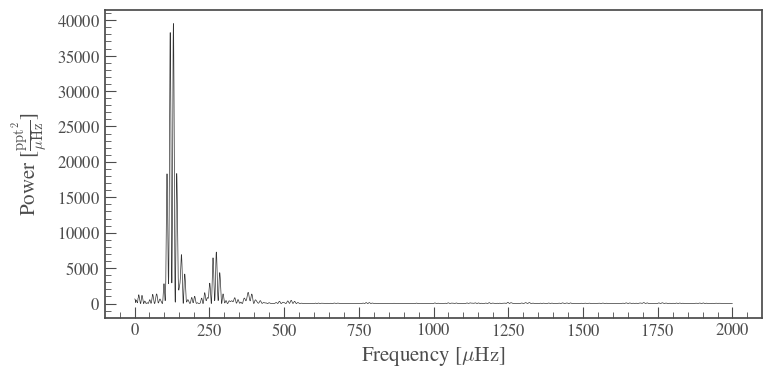

In [ ]:
pg = lc.normalize(unit='ppt').to_periodogram(normalization='psd', minimum_frequency=0.2, maximum_frequency=2000)
pg.plot()
matplotlib.pyplot.savefig('periodogram own data.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

<Axes: xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Power [$\\mathrm{\\frac{ppt^{2}}{\\mu Hz}}$]'>

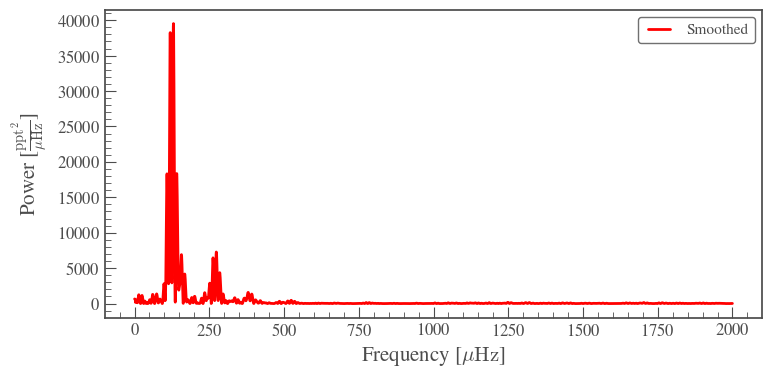

In [ ]:
ax = pg.plot()
pg.smooth(method='boxkernel', filter_width=0.3).plot(ax=ax, label='Smoothed', c='red', lw=2)

<Axes: xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Signal to Noise Ratio (SNR)'>

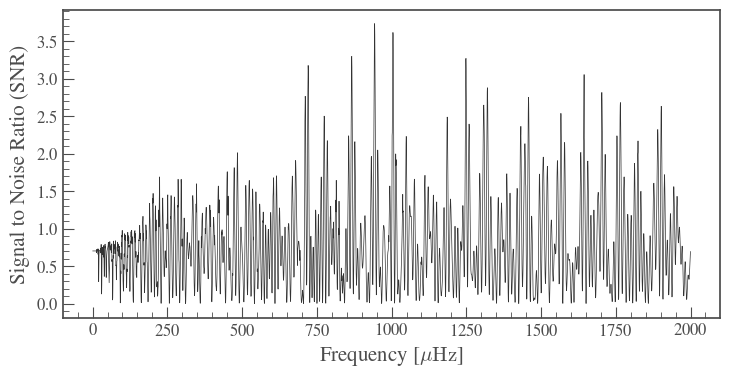

In [ ]:
snr = pg.flatten()
snr.plot()

In [ ]:
seis = snr.to_seismology()
seis

Seismology(ID: None) - no values have been computed so far.

array([<Axes: ylabel='Signal to Noise Ratio (SNR)'>,
       <Axes: ylabel='Frequency lag [$\\mathrm{\\mu Hz}$]'>,
       <Axes: xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Correlation Metric'>],
      dtype=object)

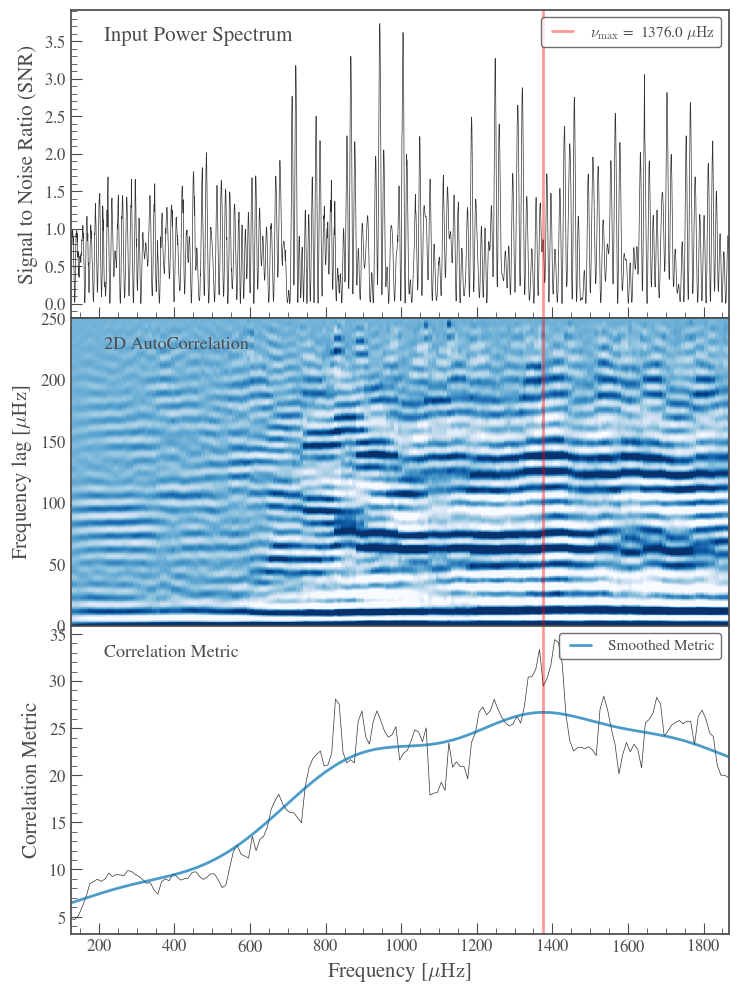

In [ ]:
seis.estimate_numax(window_width=250)
seis.diagnose_numax()

<Axes: xlabel='Frequency Lag [$\\mathrm{\\mu Hz}$]', ylabel='Scaled Auto Correlation'>

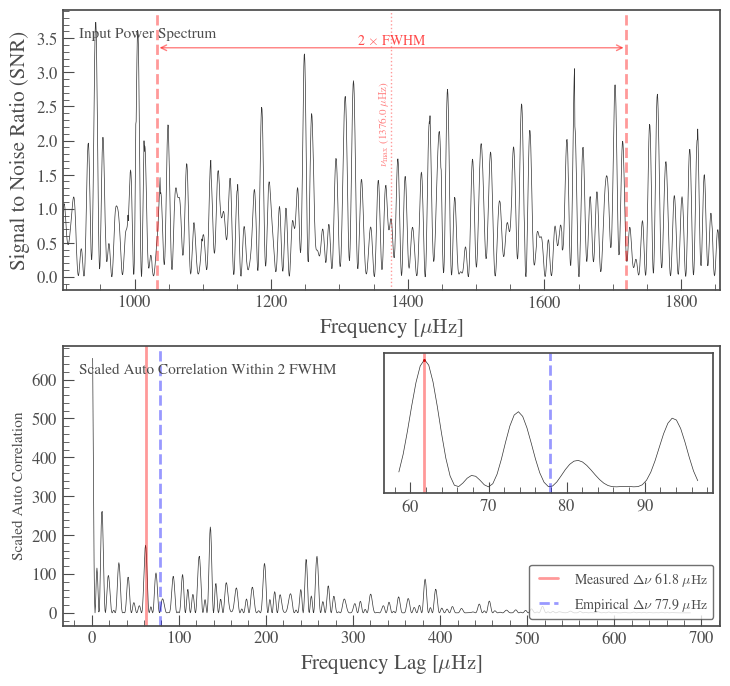

In [ ]:
seis.estimate_deltanu()
seis.diagnose_deltanu()

In [ ]:
Teff = 7549
trueradius = 2.4
truemass = 1.53
truelogg = 4.04
mass = seis.estimate_mass(Teff)
radius = seis.estimate_radius(Teff)
logg = seis.estimate_logg(Teff)
print('Radius : {} vs {:.2f} Rsol'.format(trueradius, radius.value))
print('Mass : {} vs {:.2f} Msol'.format(truemass, mass.value))
print('logg : {} vs {:.2f} dex'.format(truelogg, logg.value))

Radius : 2.4 vs 2.43 Rsol
Mass : 1.53 vs 3.02 Msol
logg : 4.04 vs 4.15 dex


In [ ]:
print(seis)

Seismology(ID: None) - computed values:
 * numax: 1376.00 uHz (method: ACF2D)
 * deltanu: 61.80 uHz (method: ACF2D)
 * mass: 3.02 solMass (method: Uncorrected Scaling Relations)
 * radius: 2.43 solRad (method: Uncorrected Scaling Relations)
 * logg: 4.15 dex (method: Uncorrected Scaling Relations)
